In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cx_Oracle
import datetime
from WindPy import w
%matplotlib inline

In [3]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [2]:
conn = cx_Oracle.connect('js_dev', '123456', 'wind')

In [235]:
query = 'select t.trade_dt, t.s_dq_adjclose \
        from wind.AShareEODPrices t \
        where t.s_info_windcode = \'300003.SZ\''

In [236]:
df = pd.read_sql_query(query, con=conn)

In [237]:
df = df.set_index('TRADE_DT')

In [238]:
df.index = pd.to_datetime(df.index)

In [239]:
df = df.sort_index()

In [240]:
df.head()

,S_DQ_ADJCLOSE
TRADE_DT,
2009-10-30,63.40
2009-11-02,57.06
2009-11-03,54.81
2009-11-04,55.86
2009-11-05,56.55


In [241]:
df['Max'] = df['S_DQ_ADJCLOSE'].rolling(243*5, min_periods=1).max()

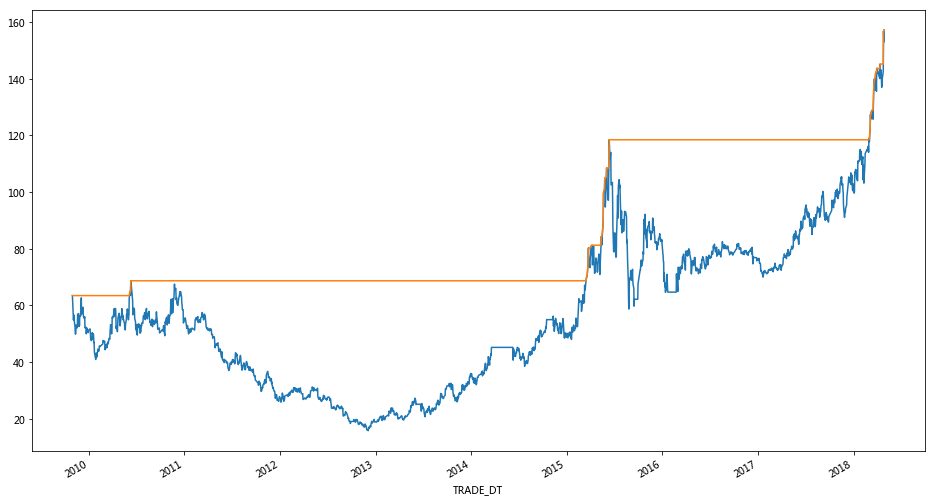

In [242]:
df['S_DQ_ADJCLOSE'].plot(figsize=(16, 9))
df['Max'].plot(figsize=(16, 9))

In [243]:
df['Max Sum'] = (df['Max'] == df['S_DQ_ADJCLOSE']).rolling(window=20).sum()

In [244]:
max_sum = df[df['Max Sum'] != 0]['Max Sum']

<BarContainer object of 160 artists>

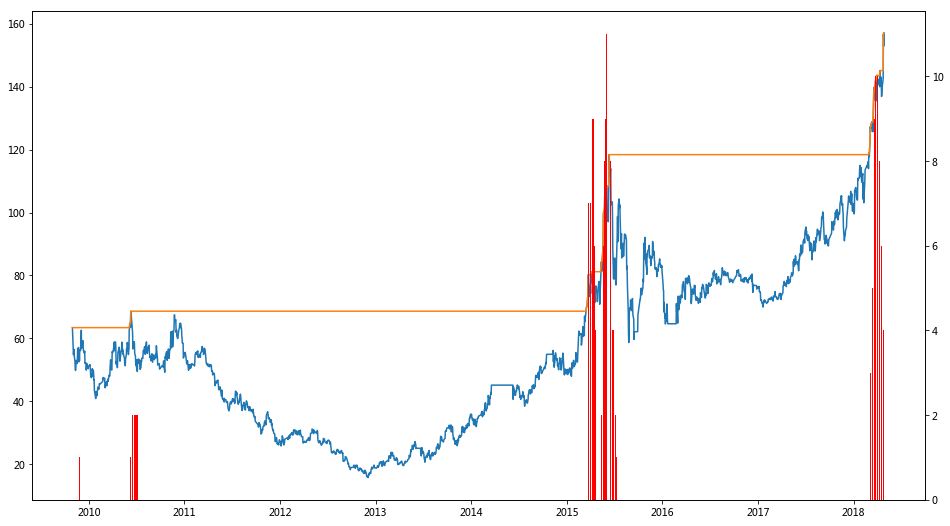

In [245]:
fig, ax1 = plt.subplots(figsize=(16, 9))
ax1.plot(df['S_DQ_ADJCLOSE'])
ax1.plot(df['Max'])
ax2 = ax1.twinx()
ax2.bar(max_sum.index, max_sum.values, color='red')

In [246]:
high = df['Max Sum'].replace([0.0], np.NAN)

In [247]:
high.dropna()

TRADE_DT
2009-11-26     1.0
2010-06-07     1.0
2010-06-08     1.0
2010-06-09     1.0
2010-06-10     2.0
2010-06-11     2.0
2010-06-17     2.0
2010-06-18     2.0
2010-06-21     2.0
2010-06-22     2.0
2010-06-23     2.0
2010-06-24     2.0
2010-06-25     2.0
2010-06-28     2.0
2010-06-29     2.0
2010-06-30     2.0
2010-07-01     2.0
2010-07-02     2.0
2010-07-05     2.0
2010-07-06     2.0
2010-07-07     2.0
2010-07-08     1.0
2010-07-09     1.0
2010-07-12     1.0
2015-03-17     1.0
2015-03-18     2.0
2015-03-19     3.0
2015-03-20     4.0
2015-03-23     5.0
2015-03-24     6.0
              ... 
2018-03-15     6.0
2018-03-16     6.0
2018-03-19     7.0
2018-03-20     8.0
2018-03-21     9.0
2018-03-22     9.0
2018-03-23     9.0
2018-03-26    10.0
2018-03-27    11.0
2018-03-28    11.0
2018-03-29    10.0
2018-03-30    11.0
2018-04-02    10.0
2018-04-03     9.0
2018-04-04     9.0
2018-04-09     9.0
2018-04-10     8.0
2018-04-11     7.0
2018-04-12     8.0
2018-04-13     8.0
2018-04-16     7.0
201